In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [5]:
lin = pd.read_table('/Users/dan/p600-f2023/hw/hw5-quijote/linear_pk.txt', sep='\s+', skiprows=7, names=['k', 'Power Spectrum'])

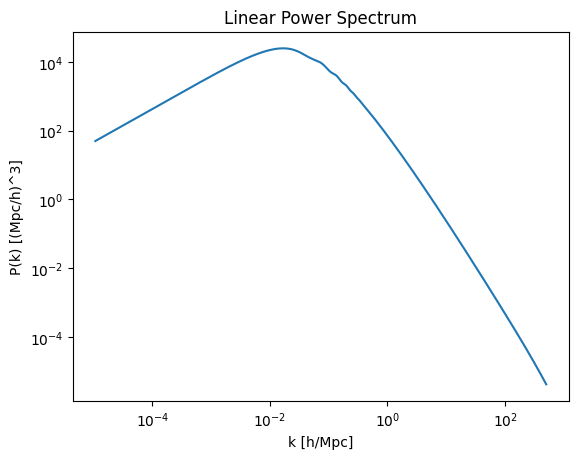

In [6]:
plt.plot(lin['k'], lin['Power Spectrum'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k) [(Mpc/h)^3]')
plt.title('Linear Power Spectrum')
plt.show()

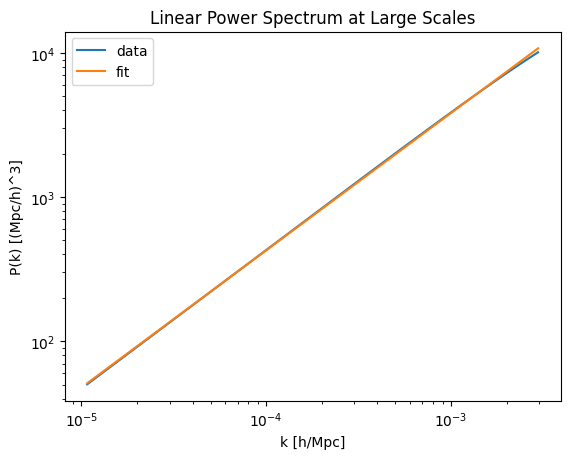

                            OLS Regression Results                            
Dep. Variable:         Power Spectrum   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.708e+06
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:32:23   Log-Likelihood:                 770.16
No. Observations:                 282   AIC:                            -1536.
Df Residuals:                     280   BIC:                            -1529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8281      0.005   2917.294      0.0

In [7]:
lower = lin[lin['k'] < 3e-3]
log_k = np.log(lower['k'])
log_k = sm.add_constant(log_k)
res = sm.OLS(np.log(lower['Power Spectrum']), log_k).fit()

#xs = np.geomspace(np.min(lower['k']), np.max(lower['k']), 100)

#xs = sm.add_constant(xs)
plt.plot(lower['k'], lower['Power Spectrum'], label='data')
#plt.plot(np.log(xs[:,1]), res.predict(xs))
plt.plot(lower['k'], np.exp(res.predict(log_k)), label='fit')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k) [(Mpc/h)^3]')
plt.title('Linear Power Spectrum at Large Scales')
plt.legend()
plt.show()
print(res.summary())

n = 0.9523, slightly deviating from the Harrison Zel'dovich spectrum of n=1. 

In [8]:
k_eq = lin['k'].iloc[np.argmax(lin['Power Spectrum'])]
print(k_eq)

0.016875


In [9]:
def transfer_fn(k, k_eq):
    if k < k_eq: return 1
    else: return k**(-2) * k_eq**2

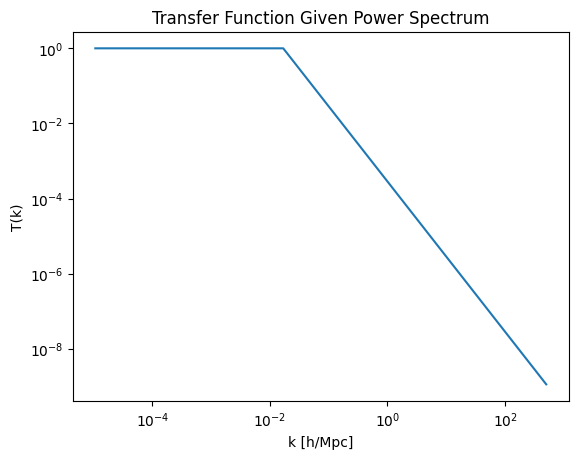

In [10]:
plt.plot(lin['k'], lin['k'].apply(transfer_fn, args=(k_eq,)))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k [h/Mpc]')
plt.ylabel('T(k)')
plt.title('Transfer Function Given Power Spectrum')
plt.show()

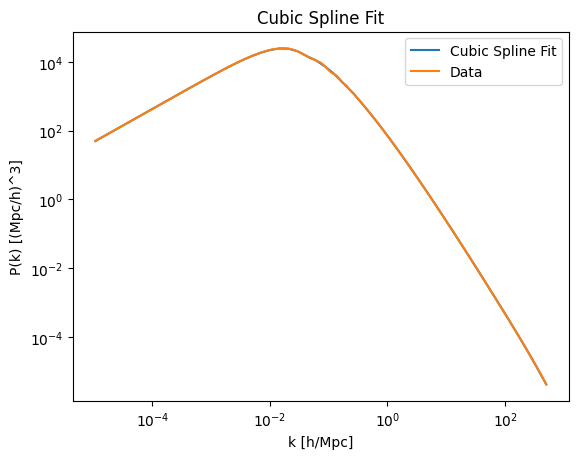

In [11]:
import scipy

cs = scipy.interpolate.CubicSpline(np.log(lin['k']), np.log(lin['Power Spectrum']))

xs = np.geomspace(np.min(lin['k']), np.max(lin['k']))
plt.plot(xs, np.exp(cs(np.log(xs))), label='Cubic Spline Fit')
plt.plot(lin['k'], lin['Power Spectrum'], label='Data')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k) [(Mpc/h)^3]')
plt.title('Cubic Spline Fit')
plt.legend()


In [12]:
def top_hat_Fourier(k, R):
    return 3/(k*R)**3 * (np.sin(k*R) - k*R*np.cos(k*R))

def integrand(log_k, R):
    return np.exp(log_k)**3/(2*np.pi**2) * np.exp(cs(log_k)) * top_hat_Fourier(np.exp(log_k), R)**2
    
def sigma_8(k, R):
    return scipy.integrate.quad(integrand, np.log(np.min(k)), np.log(np.max(k)), args=(8,))



In [13]:
sigma_8(lin['k'], 8)[0]

C:\Users\dan\AppData\Local\Temp\ipykernel_20340\1051045490.py:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return scipy.integrate.quad(integrand, np.log(np.min(k)), np.log(np.max(k)), args=(8,))


0.6947432251181663

The value is close, but is off by ~10%. We can expect that this is due to nonlinear effects

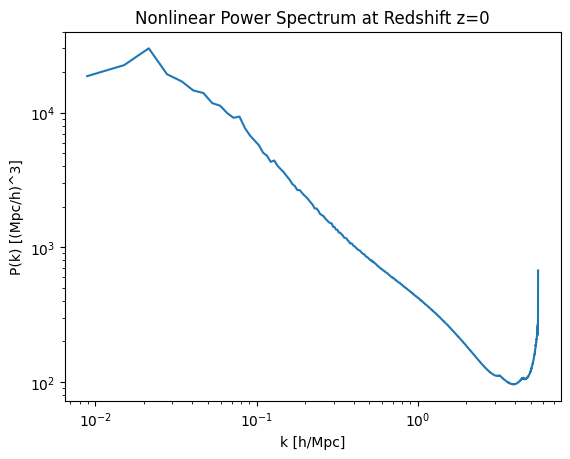

0.021447901864568367


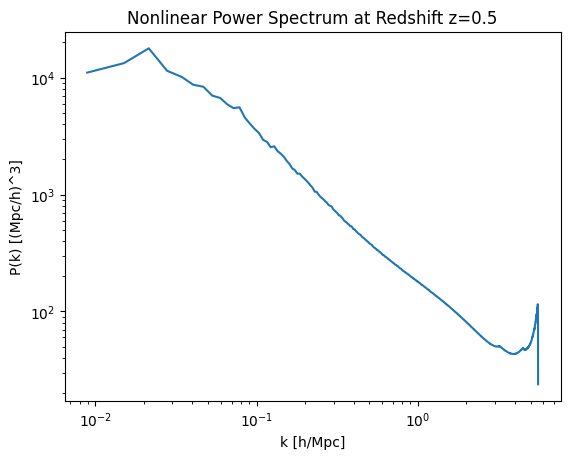

0.021447901864568367


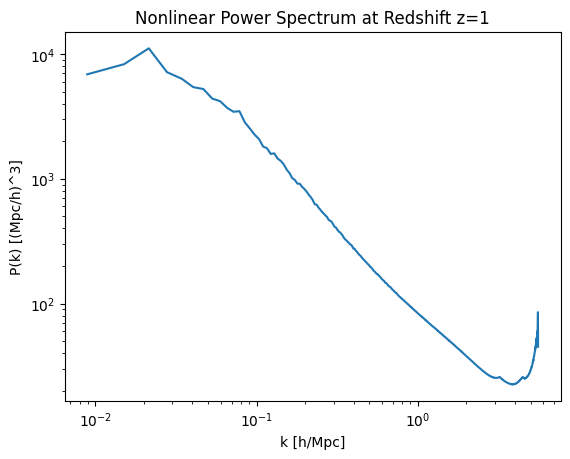

0.021447901864568367


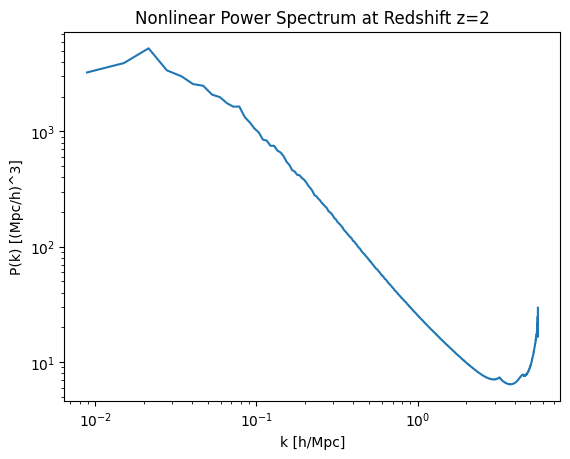

0.021447901864568367
[]


In [14]:
ps_eq_non_Lin = []

for z in [0, 0.5, 1, 2]:
    non_Lin = pd.read_table('/Users/dan/p600-f2023/hw/hw5-quijote/Pk_m_z={0}.txt'.format(z), sep='\s+', names=['k', 'Power Spectrum'])
    plt.plot(non_Lin['k'], non_Lin['Power Spectrum'])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k [h/Mpc]')
    plt.ylabel('P(k) [(Mpc/h)^3]')
    plt.title('Nonlinear Power Spectrum at Redshift z={0}'.format(z))
    
    plt.show()
    print(non_Lin['k'].iloc[np.argmax(non_Lin['Power Spectrum'])])
    #ps_eq_non_Lin.append(non_Lin['Power Spectrum'].iloc[np.argmax(non_Lin['Power Spectrum'])])
    
k_eq_non_Lin = non_Lin['k'].iloc[np.argmax(non_Lin['Power Spectrum'])]
print(ps_eq_non_Lin)

The overall shape is very similar to that of the linear power spectrum, but there is a tail end which rises for the nonlinear power spectrum

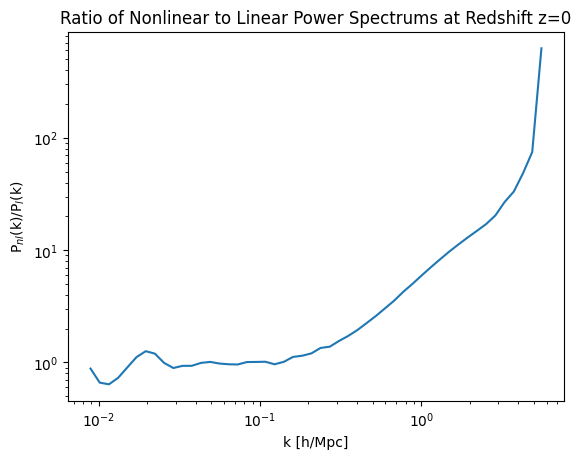

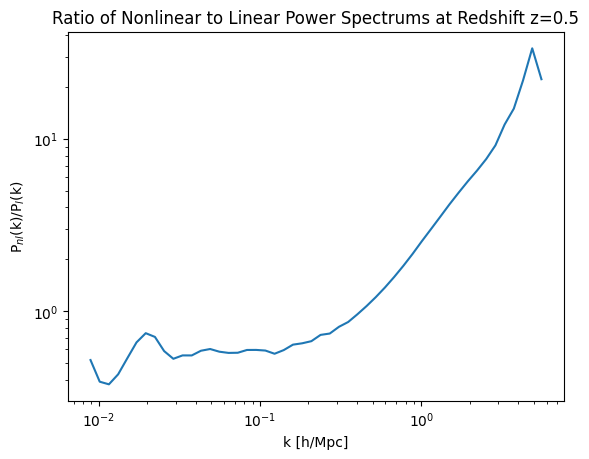

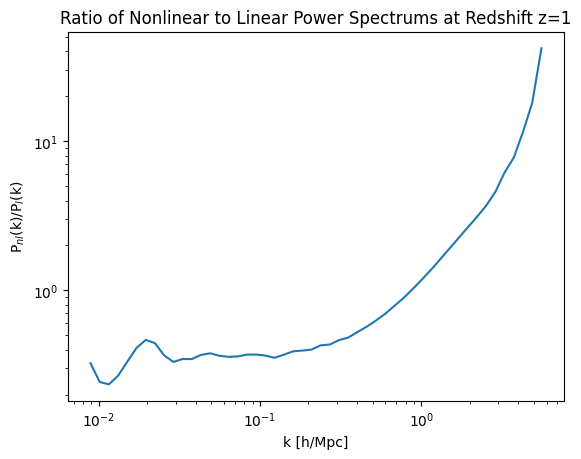

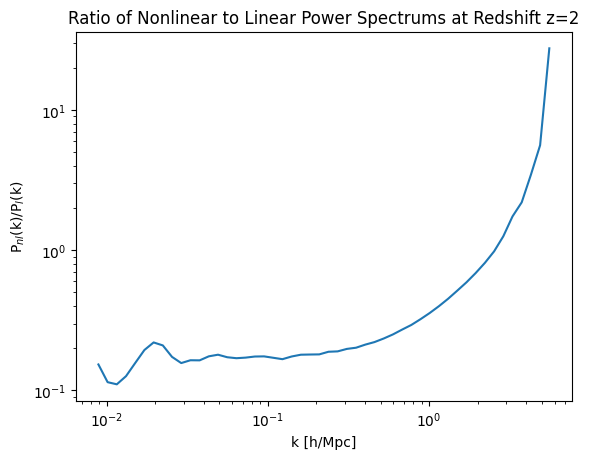

[1.2424555948454141, 0.736393726847794, 0.459261694332794, 0.2174171735710064]


In [15]:
z_arr = [0, 0.5, 1, 2]

ps_ratio_eq = []
for z in z_arr:
    non_Lin = pd.read_table('/Users/dan/p600-f2023/hw/hw5-quijote/Pk_m_z={0}.txt'.format(z), sep='\s+', names=['k', 'Power Spectrum'])
#     plt.plot(non_Lin['k'], non_Lin['Power Spectrum'])
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.show()
#     print(non_Lin['k'].iloc[np.argmax(non_Lin['Power Spectrum'])])
    
    cs_non_Lin = scipy.interpolate.CubicSpline(np.log(non_Lin['k']), np.log(non_Lin['Power Spectrum']))

    xs1 = np.geomspace(np.min(non_Lin['k']), np.max(non_Lin['k']))
    plt.plot(xs1, np.exp(cs_non_Lin(np.log(xs1))) / np.exp(cs(np.log(xs1))))
    
    ps_ratio_eq.append(np.exp(cs_non_Lin(np.log(k_eq_non_Lin))) / np.exp(cs(np.log(k_eq_non_Lin))))
    #plt.plot(lin['k'], lin['Power Spectrum'])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('k [h/Mpc]')
    plt.ylabel('P$_{nl}$(k)/P${_l}$(k)')
    plt.title('Ratio of Nonlinear to Linear Power Spectrums at Redshift z={0}'.format(z))
    plt.show()
    
print(ps_ratio_eq)
ps_ratio_eq = np.array(ps_ratio_eq)

The ratio of the power spectrums at large scales is ~1 at redshift z=0, but gradually decreases at higher redshifts, reaching 1/10 at z=2. The ratio of the power spectrums at small scales increases sharply - the nonlinear power spectrum is much higher, as we have seen in the presence of the tail. This peak also gradually decreases with redshift. This breakdown of the linear power spectrum happens at around k=0.3 at redshift z=0, and increases to around k=1 at redshift z=2.

Text(0.5, 1.0, 'Growth Function from Power Spectra')

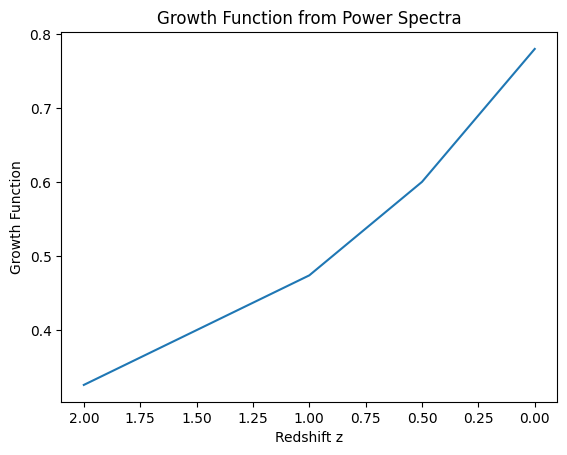

In [22]:
#for i in range(len(z_arr)):
z_arr = np.array(z_arr)

growth_ps = np.sqrt(ps_ratio_eq/ps_ratio_eq[0]*0.78**2)

plt.plot(z_arr, growth_ps)
plt.gca().invert_xaxis()
plt.xlabel('Redshift z')
plt.ylabel('Growth Function')
plt.title('Growth Function from Power Spectra')

The growth function is normalized such that the growth function is 0.78 (from the analytic solution) at redshift z=0.

In [17]:
def frac_DE(log_a, Omega_m=0.3175):
    return (1 - Omega_m) / ((1 - Omega_m) + Omega_m * np.exp(log_a)**(-3))

def ode(log_a, g):
    return [g[1], -(5/2 + 3/2 * frac_DE(log_a)) * g[1] - 3 * frac_DE(log_a) * g[0]]



In [18]:
redshift = np.linspace(2, 0, 100)

log_as = np.log(1/(1+redshift))

sol = scipy.integrate.solve_ivp(ode, [-5, 0], [1, 0], t_eval=log_as)
growth_analytic = sol.y[0,:] * 1/(1+redshift)

Text(0.5, 1.0, 'Analytic Growth Function')

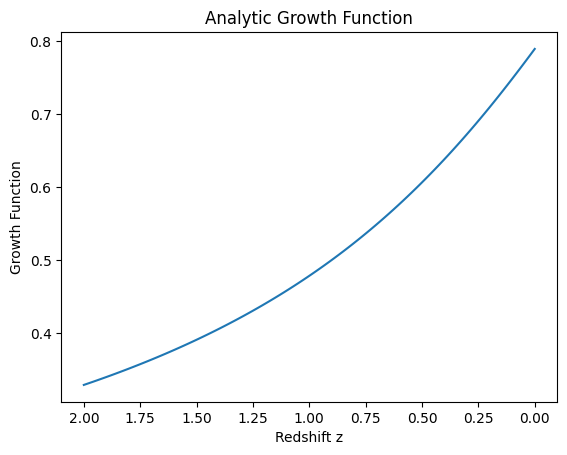

In [19]:
plt.plot(redshift, growth_analytic)
plt.gca().invert_xaxis()
plt.xlabel('Redshift z')
plt.ylabel('Growth Function')
plt.title('Analytic Growth Function')

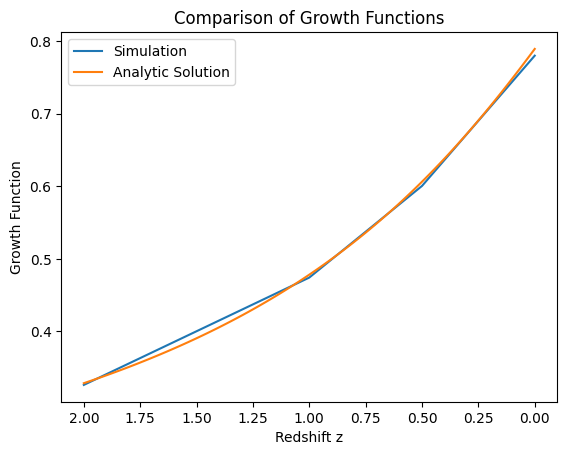

In [23]:
plt.plot(z_arr, growth_ps, label='Simulation')
plt.plot(redshift, growth_analytic, label='Analytic Solution')
plt.gca().invert_xaxis()
plt.xlabel('Redshift z')
plt.ylabel('Growth Function')
plt.title('Comparison of Growth Functions')
plt.legend()

The growth functions calculated from the ratio of the power spectrums and from the analytic solution are very similar. 

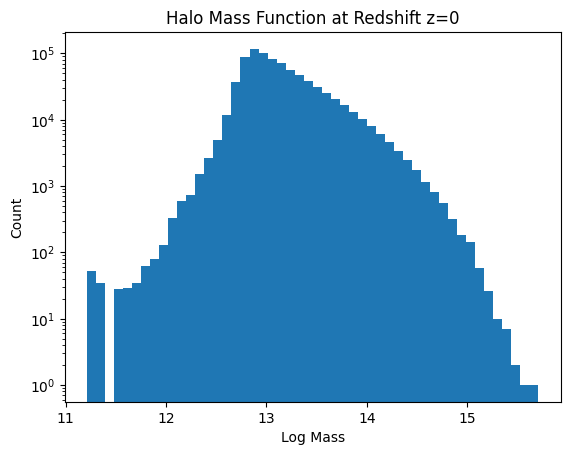

Mass per particle: 18195011514.611538


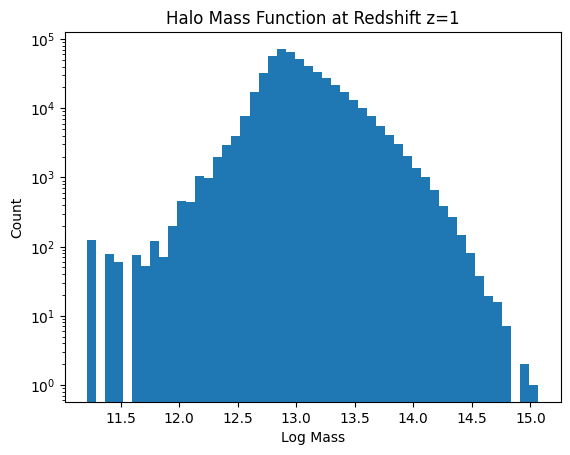

Mass per particle: 6876961314.585061


In [24]:
for z in [0, 1]:
    halo_mass = pd.read_table('/Users/dan/p600-f2023/hw/hw5-quijote/halo_z={0}.txt'.format(z), sep='\s+', header=0)
    mass = np.sum(halo_mass['Mvir']) / 1024**3
    plt.hist(np.log10(halo_mass['Mvir']), log=True, bins=50)
    plt.xlabel('Log Mass')
    plt.ylabel('Count')
    plt.title('Halo Mass Function at Redshift z={0}'.format(z))
    plt.show()
    print('Mass per particle: {0}'.format(mass))
    


There is a turnover at around Halo Mass ~ 10E13. 

In [25]:
def calc_sigma_M(M, n_eff, z):
    if z == 0: growth_fn = growth_ps[0]
    if z == 1: growth_fn = growth_ps[2]
    return growth_fn * M ** (-(n_eff+3)/6)